In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/Social_Network_Ads.csv")
data.drop(columns=["User ID","Gender"],inplace=True)
data.head(4)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

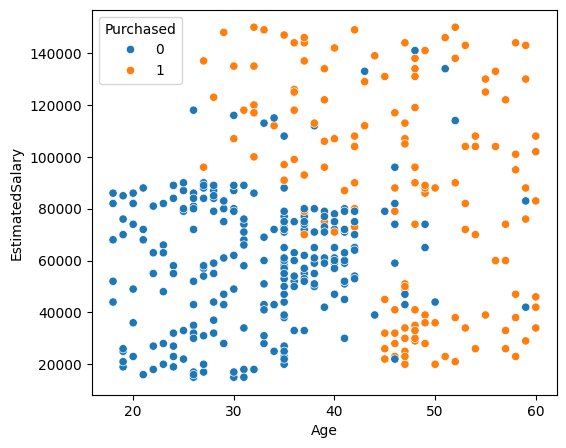

In [63]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Age",y="EstimatedSalary",data=data,hue="Purchased")

In [64]:
x=data.iloc[:,:-1]
y=data["Purchased"]

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(x_train,y_train)
lor.score(x_test,y_test)*100

86.25

In [69]:
lor.predict([[48,29000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


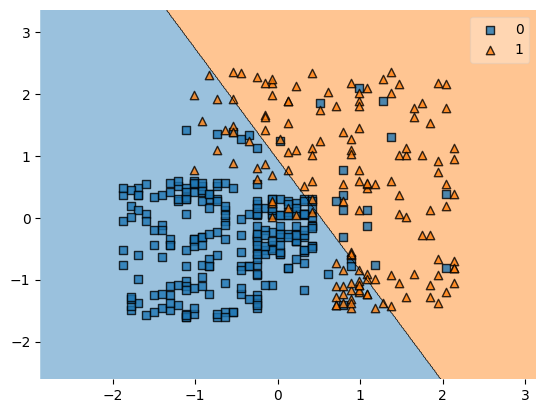

In [74]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lor)
plt.show()